Lab 2: Data analysis and visualization with pandas

In [38]:
# Name: Ulises Marian

Write code to investigate population data of countries of the world (again!)

In [1]:
# Import modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. From `countries.xlsx` file, read in all data into a DataFrame, make the country names the row labels (the index for the rows), and remove the SpecialNotes column.
<br>a. Print the number of countries in the resulting DataFrame
<br>b. Print the first 3 lines of country data in the resulting DataFrame.

In [9]:
countries = pd.read_excel("countries.xlsx", index_col = "CountryName")
countries = countries.drop(columns=["SpecialNotes"])
countries
#could do it all in one line: 
#countries = pd.read_excel("countries.xlsx", index_col = "CountryName").drop(columns=["SpecialNotes"]).drop(columns=["SpecialNotes"])

num_of_countries = len(countries.index)
print(f"number of countries: {num_of_countries} \n")

print(countries.head(3))



#alternative
#first_three_lines = countries[0:3]
#print(first_three_lines)

number of countries: 215 

            CountryCode                     Region        LevelOfIncome
CountryName                                                            
Aruba               ABW  Latin America & Caribbean          High income
Afghanistan         AFG                 South Asia           Low income
Angola              AGO         Sub-Saharan Africa  Lower middle income


2. Shorten the column names so it's easy to type them:
<br>CountryCode => Code, Region => Region, LevelOfIncome => Income
<br>Challenge: do this in one line of code
<br>Print the first lines of country data in the DataFrame

In [11]:
#countries.columns = ["Code", "Region", "Income"]

#alternative
#countries.rename(columns={"CountryCode": "Code", "LevelOfIncome":"Income"}, inplace=True)

countries.columns = countries.columns.str.extract('([A-Z][a-z]+)$', expand=False)


print(countries.head(5))  #printing first (5) lines...

#alternative
#print(countries[:5])  #printing first lines...

array(['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD',
       'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
       'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI',
       'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN',
       'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAC', 'MAF', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX',
       'MHL', 'MKD',

3. From `population.xlsx` file, read in all data into another DataFrame, and also make the country names the row labels.
<br>Remove the Country Code, Indicator Name, Indicator Code, and 2020 columns since they contain duplicate data or unnecessary data.
<br>a. Print the number of rows and columns of the resulting DataFrame.
<br>b. Print the last 3 lines of the Dataframe

In [76]:
population = pd.read_excel("population.xlsx", index_col="Country Name")
population = population.drop(columns=["Country Code", "Indicator Name", "Indicator Code", "2020"])
#print(population)

num_of_rows = len(population.index)
num_of_columns = len(population.columns)
print(f"number of rows: {num_of_rows}")
print(f"number of columns: {num_of_columns}")
print()

print(population.tail(3))

number of rows: 215
number of columns: 60

                   1960       1961       1962       1963       1964  \
Country Name                                                          
South Africa 17,099,840 17,524,533 17,965,725 18,423,161 18,896,307   
Zambia        3,070,776  3,164,329  3,260,650  3,360,104  3,463,213   
Zimbabwe      3,776,681  3,905,034  4,039,201  4,178,726  4,322,861   

                   1965       1966       1967       1968       1969  ...  \
Country Name                                                         ...   
South Africa 19,384,841 19,888,250 20,406,864 20,942,145 21,496,075  ...   
Zambia        3,570,464  3,681,955  3,797,873  3,918,872  4,045,740  ...   
Zimbabwe      4,471,177  4,623,351  4,779,827  4,941,906  5,111,337  ...   

                  2010      2011       2012       2013       2014       2015  \
Country Name                                                                   
South Africa  51216964  52004172 52,834,005 53,689,236 54,54

4. Combine the 2 DataFrames side by side into one DataFrame that has:
<br>- the same number of rows as the 2 original DataFrames
<br>- the country names are the row labels
<br>- the order of data for each country is: Code, Region, Income, then all the years.
<br>Print the first 5 lines of data the resulting DataFrame.

In [77]:
combined_dataframes = pd.concat([countries, population], axis=1)
combined_dataframes.head(5)  #printing first 5 lines

#print(combined_dataframes)


,Code,Region,Income,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Aruba,ABW,Latin America & Caribbean,High income,"54,211","55,438","56,225","56,695","57,032","57,360","57,715",...,101669,102046,"102,560","103,159","103,774","104,341","104,872","105,366","105,845","106,314"
Afghanistan,AFG,South Asia,Low income,"8,996,973","9,169,410","9,351,441","9,543,205","9,744,781","9,956,320","10,174,836",...,29185507,30117413,"31,161,376","32,269,589","33,370,794","34,413,603","35,383,128","36,296,400","37,172,386","38,041,754"
Angola,AGO,Sub-Saharan Africa,Lower middle income,"5,454,933","5,531,472","5,608,539","5,679,458","5,735,044","5,770,570","5,781,214",...,23356246,24220661,"25,107,931","26,015,780","26,941,779","27,884,381","28,842,484","29,816,748","30,809,762","31,825,295"
Albania,ALB,Europe & Central Asia,Upper middle income,"1,608,800","1,659,800","1,711,319","1,762,621","1,814,135","1,864,791","1,914,573",...,2913021,2905195,"2,900,401","2,895,092","2,889,104","2,880,703","2,876,101","2,873,457","2,866,376","2,854,191"
Andorra,AND,Europe & Central Asia,High income,"13,411","14,375","15,370","16,412","17,469","18,549","19,647",...,84449,83747,"82,427","80,774","79,213","78,011","77,297","77,001","77,006","77,142"


5. First, we check that the number of missing data values is not too large.
<br>Calculate the number of missing data (NaN values) as a percentage of the total data values.
<br>This is the ratio of the number of NaN's and the total number of data values.
<br>Print the ratio as a percentage, with text explanation such as:  Percent NaN: 0.6%

In [78]:
#amount_nans = combined_dataframes.isna().sum().sum()
#print(amount32_nans)

#data.isna() -> 2d array of True/False
#data.isna().sum() => count of rows of True
#data.isna().sum().sum() => count of True from all rows


amount_nans = len(combined_dataframes.values[combined_dataframes.isna()])
#print(amount_nans)
total_data_values = combined_dataframes.count().sum()
#print(total_data_values)
percentage_of_nans = amount_nans/total_data_values * 100
#print(percentage_of_nans)


print(f"Percent NaN: {str(percentage_of_nans)[0:7]}%")


Percent NaN: 0.58666%


Since the number of missing data is small, we can use the data to observe the world population. In questions 6,7,8 we'll see different ways that data scientists work with data.

6a. Sometimes we can work with exact data when doing data analysis.
<br>
<br>Find and print the 2019 total population of each region of the world, sorted by the population in descending order (highest population first).
<br>To print the population values with comma, the pandas float_format has been set for you.

In [79]:
pd.options.display.float_format = '{:,.0f}'.format

#region_2019 = combined_dataframes[["Region", "2019"]].groupby("Region").sum().sort_values(by="2019", ascending=False)
#alternative (I think it might work too)...
# region_2019 = combined_dataframes.groupby("Region")["2019"].sum().sort_values(by="2019", ascending=False)
print(region_2019)

#print(region_2019.loc["Sub-Saharan Africa"])
regions = region_2019.index
populations = region_2019.values

#splitting it up - for simplicity/understanding sake:

#region_2019 = combined_dataframes[["Region", "2019"]].groupby("Region").sum()
sorted_region_pop = region_2019.sort_values(by="2019", ascending=False)

                                    2019
Region                                  
East Asia & Pacific        2,316,980,045
South Asia                 1,835,776,742
Sub-Saharan Africa         1,103,460,781
Europe & Central Asia        921,140,092
Latin America & Caribbean    646,430,843
Middle East & North Africa   452,022,098
North America                365,892,703


6b. Plot the 2019 population of each region. Use the appropriate plot, and be sure to have the title, x-axis label, y-axis label, and appropriate ticks.
<br>From the plot you can see which parts of the world have the most or the least people.
<br>There is extra credit for this question. See the group work extra credit if you like.

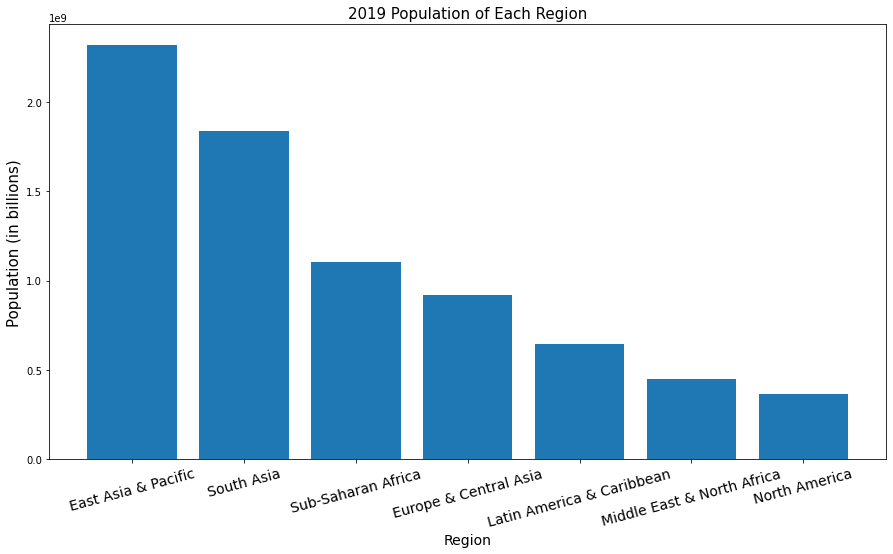

In [46]:
# Bar chart better option for illustrating eaach region's 2019 population.

region_populations = region_2019.values.ravel()  #.ravel()....flatten 2d array

fig = plt.figure(figsize=(15,8))

plt.bar(np.arange(len(region_2019.index)), region_populations, align="center")

plt.title("2019 Population of Each Region", fontsize=15)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Population (in billions)", fontsize=15)
plt.xticks(np.arange(len(region_2019.index)),(region_2019.index), rotation=15, fontsize=14)

plt.show()


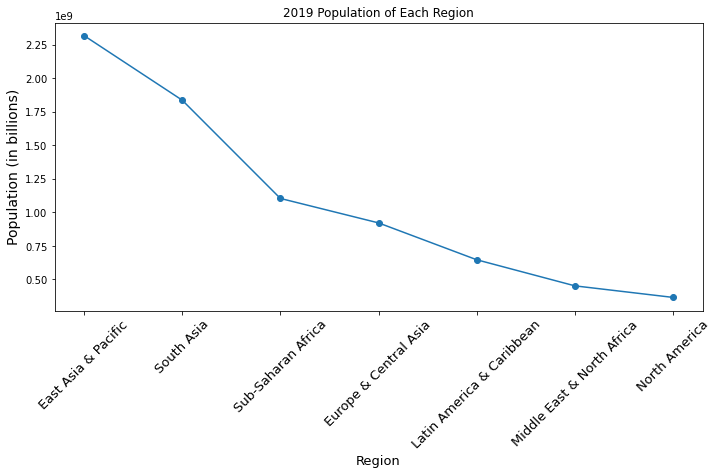

In [47]:
#had initially used a plot line for the above....which is not the best option. Kept the plot for reference/practice.
pd.options.display.float_format = '{:,.0f}'.format
plt.title("2019 Population of Each Region")
plt.xlabel("Region", fontsize=13)
plt.ylabel("Population (in billions)", fontsize=14)

plt.xticks(np.arange(len(region_2019.index)),(region_2019.index), rotation=45, fontsize=13)
#plt.yticks(np.arange(len(region_2019.values)),(region_2019.values), rotation=45)

plt.plot(region_2019, '-o')
plt.subplots_adjust(left=2, bottom=2, right=3.5, top=3)

7a. Sometimes the dataset is too large to look at individual data values, so we look at data trends instead.
<br>
<br>Plot the population of all the regions in the past 40 years, in order to see their growth rate.
<br>Be sure to have a title, x-axis label, y-axis label, and a legend.
<br>For the years, print out every 10 years: 1960, 1970, ..., 2000, 2010, 2020
<br>The years should be taken from the DataFrame, except for 2020, which you can add in the code.

['1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']


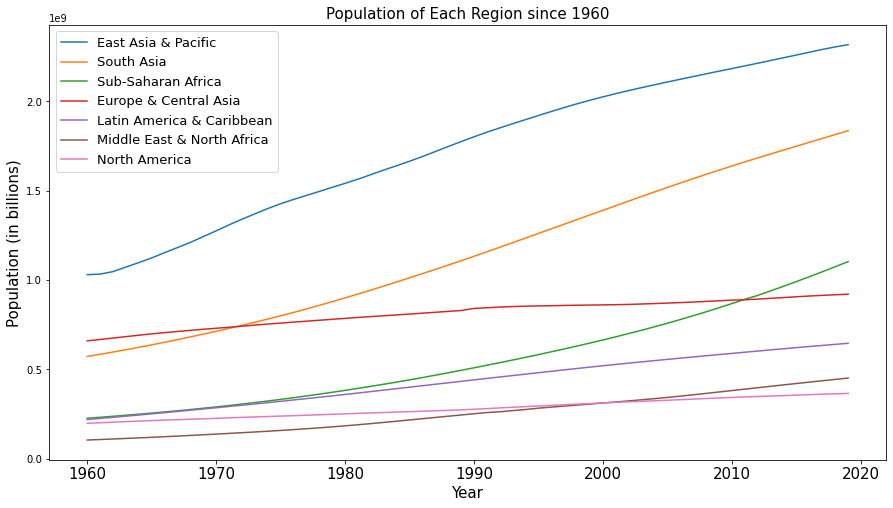

In [81]:
past_forty_years = combined_dataframes.groupby("Region").sum().sort_values(by="2019", ascending=False)
#print(past_forty_years)

fig = plt.figure(figsize=(15,8))

plt.title("Population of Each Region since 1960", fontsize=15)
plt.ylabel("Population (in billions)", fontsize=15)
plt.xlabel("Year", fontsize=15)

###use loop instead, rather than copying the code over and over...
# plt.plot(past_forty_years.columns, past_forty_years.loc["East Asia & Pacific"], linestyle='solid', label="East Asia & Pacific")
# plt.plot(past_forty_years.columns, past_forty_years.loc["South Asia"], linestyle='dashed' , label="South Asia")
# plt.plot(past_forty_years.columns, past_forty_years.loc["Sub-Saharan Africa"], linestyle='dashdot', label="Sub-Saharan Africa")
# plt.plot(past_forty_years.columns, past_forty_years.loc["Europe & Central Asia"], '-', label="Europe & Central Asia")
# plt.plot(past_forty_years.columns, past_forty_years.loc["Latin America & Caribbean"], '-', label="Latin America & Caribbean")
# plt.plot(past_forty_years.columns, past_forty_years.loc["Middle East & North Africa"], '-.', label="Middle East & North Africa")
# plt.plot(past_forty_years.columns, past_forty_years.loc["North America"], '-', label="North America")

#alternative (looping) to above
for region in past_forty_years.index.values:
    plt.plot(past_forty_years.columns, past_forty_years.loc[region], label=region)
    

#to show labels
plt.legend(fontsize=13)

#list comprehension
extracting_decades = [year for year in past_forty_years.columns[::10]]    
extracting_decades.append("2020")
#print(extracting_decades)



plt.xticks(extracting_decades, fontsize=15) #appending "2020" directly ruins the xticks

plt.show()

7b. Answer in your own words:
<br>- Which 2 regions have the most growth? How do you know that from the plot?
<br>- Which region has the fastest growth in the past 10 years? How do you know that from the plot?
<br>- Which 2 regions have the slowest growth? How do you know that from the plot?

In [49]:
#East Asia & Pacific, and South Asia are the two regions with the most growth.
#It's easy to note that because the plot, especially the y (population in billions) and the x (years) axes,
#provide us with a visual and quantitative reference of how much each region has grown between 1960-2020. 

#In the past 10 years, Sub-Saharan Africa is the region with the fastest growth.
#I know that because the plot shows that Sub-Sahara Africa has the biggest slope (2010-2020)

#North America, and Europe and Central Asia are the two regions with the slowest growth.
#It's easy to see that from the plot, because their rates of change are the smallest,
#that is, the lines have barely moved upward in relation to the y axis, they are almost horizontal.

8a. Sometimes there are multiple ways to interpret data.
<br>
<br>You want to see if there's any relationship between income group and population of countries. 
<br>For example, are the higher populated countries in the high income group while the lower populated countries are in the low income group? Or is it the other way? Or maybe there's no correlation between population and income?
<br>Use any tool that we've discussed (and only those tools please), and use the 2019 population and income group, to find the answer to the question. Show your work in the cell below.

                             2019
Income                           
High income         1,212,204,591
Low income            664,957,848
Lower middle income 2,908,678,085
Upper middle income 2,855,862,780


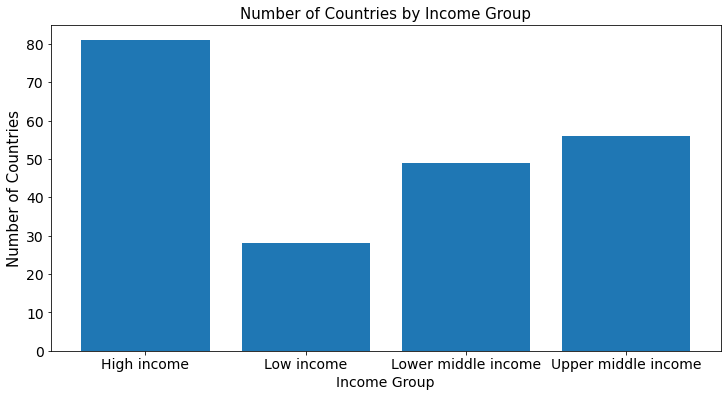

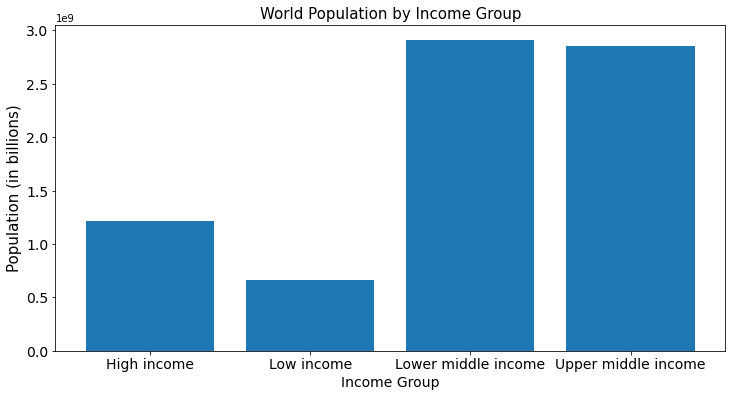

In [50]:
income_and_population = combined_dataframes[["Income", "2019"]].groupby("Income").sum()
print(income_and_population)

fig = plt.figure(figsize=(12,6))

number_of_countries_in_each_income_group = combined_dataframes[["Income", "2019"]].groupby("Income").count()
num_countries_income = number_of_countries_in_each_income_group.values.ravel()
#print(num_countries_income)
plt.bar(np.arange(len(income_and_population.index)),(num_countries_income))
plt.xticks(np.arange(len(income_and_population.index)),income_and_population.index, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Income Group", fontsize=14)
plt.ylabel("Number of Countries", fontsize=15)
plt.title("Number of Countries by Income Group", fontsize=15)

#abc = combined_dataframes[["Income", "2019"]], combined_dataframes.loc["Income"]
#print(abc)

fig = plt.figure(figsize=(12,6))

population_values = income_and_population.values.ravel()
plt.bar(np.arange(len(income_and_population.values)), population_values)
plt.xticks(np.arange(len(income_and_population.index)), income_and_population.index, fontsize=14)
plt.ylabel("Population (in billions)", fontsize=15)
plt.xlabel("Income Group", fontsize=14)
plt.yticks(fontsize=14)
plt.title("World Population by Income Group", fontsize=15)
#type(income_and_population.index)
plt.show()

8b. Based on the output of the work you did in #8a, what's your conclusion about the relationship between income group and population?
<br>Note that the output for #8a should clearly support your conclusion. This means the output should not be a lot of numbers, which is difficult for non-technical people to observe patterns. One job of data scientists is to present their conclusion in a manner which is clear to smart but not necessarily math-oriented people, such as the customers, managers, etc.
<br>There is extra credit for this question. See the group work extra credit if you like.

In [51]:
#Despite there being more than 80 high income countries, 
#their total population is only greater than the low income group's.
#So, regarding high income countries, I conclude that countries in the high income group tend to have small populations.

#On the other hand, there are less than 30 low income countries (i.e., about 1/3 the # of high income countries),
#yet their total population is about half the total population of the high income group. 
#Thus, I conclude that low income countries have larger populations than high income countries.

#Clearly, the countries with the largest populations are the countries in the middle (lower and upper) income group,
#particularly the lower (middle) income ones. 
#It is worth noting that there are 30 less countries in the lower middle income group than in the high income group,
#nevertheless, the population of the lower middle income gorup is about 2.5x that of the high income group.